# GROUP MEMBERS

## Sharmaine Mangombe      N0187521H
## Cresentia B Moyo              N0182139X
## Martha Nobela                    N0182377L



# Import Library

In [48]:
import numpy as np
import pandas as pd 
from keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os



# Define Constants

In [49]:
FAST_RUN = False
IMAGE_WIDTH=200
IMAGE_HEIGHT=200
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3

# Prepare Traning Data

In [50]:
filenames = os.listdir('C:/Users/Administrator/Desktop/4.2 Informatics/Geo-Info/train/train')
categories = []
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'formal':
        categories.append(1)
    else:
        categories.append(0)

df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

In [51]:
df.head()

,filename,category
0,formal. (1).PNG,1
1,formal. (10).PNG,1
2,formal. (11).PNG,1
3,formal. (12).PNG,1
4,formal. (13).PNG,1


In [52]:
df.tail()

,filename,category
39,informal. (5).PNG,0
40,informal. (6).PNG,0
41,informal. (7).PNG,0
42,informal. (8).PNG,0
43,informal. (9).PNG,0


### See Total In count

In [53]:
df['category'].value_counts()

1    22
0    22
Name: category, dtype: int64

From our data we have 22 formal settlements and 22 informal settlements

# See sample image

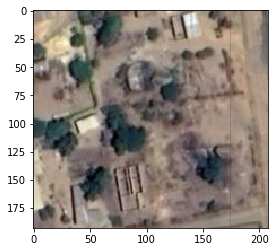

In [54]:
sample = random.choice(filenames)
image = load_img("C:/Users/Administrator/Desktop/4.2 Informatics/Geo-Info/train/train/"+sample)
plt.imshow(image)

In [55]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax')) # 2 because we have formal and informal classes

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 198, 198, 32)      896       
                                                                 
 batch_normalization_6 (Batc  (None, 198, 198, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 99, 99, 32)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 99, 99, 32)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 97, 97, 64)        18496     
                                                                 
 batch_normalization_7 (Batc  (None, 97, 97, 64)      

# Prepare data

Because we will use image genaretor `with class_mode="categorical"`. We need to convert column category into string. Then imagenerator will convert it one-hot encoding which is good for our classification. 

So we will convert 1 to formal and 0 to infromal

In [56]:
df["category"] = df["category"].replace({0: 'informal', 1: 'formal'}) 

In [57]:
train_df, validate_df = train_test_split(df, test_size=0.20, random_state=42)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

In [58]:
train_df['category'].value_counts().dtype

dtype('int64')

In [59]:
validate_df['category'].value_counts()

informal    6
formal      3
Name: category, dtype: int64

In [60]:
total_train = train_df.shape[0]
total_validate = validate_df.shape[0]
batch_size=15

# Traning Generator

In [61]:
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1/255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_generator = train_datagen.flow_from_dataframe(
    train_df, 
    "C:/Users/Administrator/Desktop/4.2 Informatics/Geo-Info/train/train/", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 35 validated image filenames belonging to 2 classes.


### Validation Generator

In [62]:
validation_datagen = ImageDataGenerator(rescale=1/255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    "C:/Users/Administrator/Desktop/4.2 Informatics/Geo-Info/train/train", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 9 validated image filenames belonging to 2 classes.


# Fit Model

In [63]:
epochs=3 if FAST_RUN else 5
history = model.fit_generator(
    train_generator, 
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size
)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/5
2/2 [==============================] - 19s 12s/step - loss: 1.2385 - accuracy: 0.6000
Epoch 2/5
2/2 [==============================] - 19s 16s/step - loss: 1.0564 - accuracy: 0.8000
Epoch 3/5
2/2 [==============================] - 6s 3s/step - loss: 0.2550 - accuracy: 0.8500
Epoch 4/5
2/2 [==============================] - 4s 3s/step - loss: 0.0081 - accuracy: 1.0000
Epoch 5/5
2/2 [==============================] - 4s 2s/step - loss: 0.0248 - accuracy: 1.0000


# Visualize Training

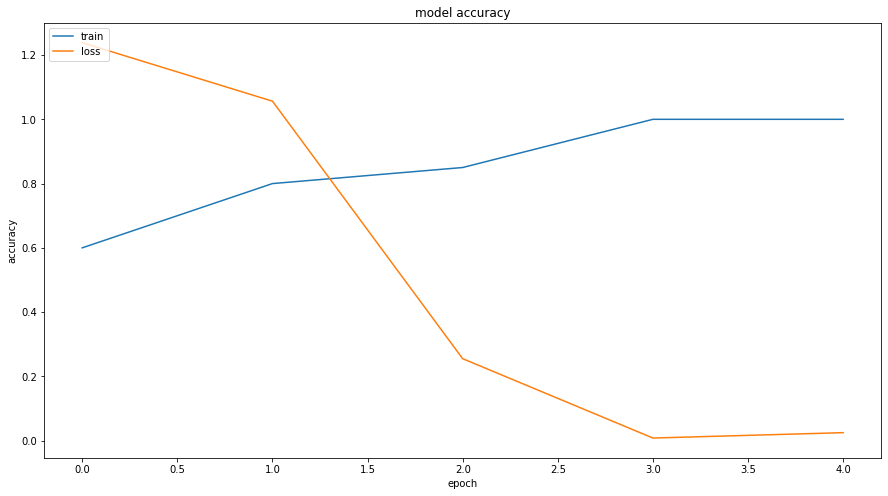

In [64]:
plt.figure(figsize=(15, 8))
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'loss'], loc='upper left')


# Prepare Testing Data

In [65]:
test_filenames = os.listdir("C:/Users/Administrator/Desktop/4.2 Informatics/Geo-Info/test/")
test_df = pd.DataFrame({
    'filename': test_filenames
})
nb_samples = test_df.shape[0]

# Create Testing Generator

In [66]:
test_gen = ImageDataGenerator(rescale=1/255)
test_generator = test_gen.flow_from_dataframe(
    test_df, 
    "C:/Users/Administrator/Desktop/4.2 Informatics/Geo-Info/test/", 
    x_col='filename',
    y_col=None,
    class_mode=None,
    target_size=IMAGE_SIZE,
    batch_size=batch_size,
    shuffle=False
)

Found 4 validated image filenames.


# Predict

In [67]:
predict = model.predict_generator(test_generator, steps=np.ceil(nb_samples/batch_size))
test_df['category'] = np.argmax(predict, axis=-1)
label_map = dict((v,k) for k,v in train_generator.class_indices.items())
test_df['category'] = test_df['category'].replace(label_map)
test_df['category'] = test_df['category'].replace({ 'formal': 1, 'informal': 0 })

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  """Entry point for launching an IPython kernel.


In [68]:
test_df['category'].value_counts()

1    2
0    2
Name: category, dtype: int64

### See predicted result with images

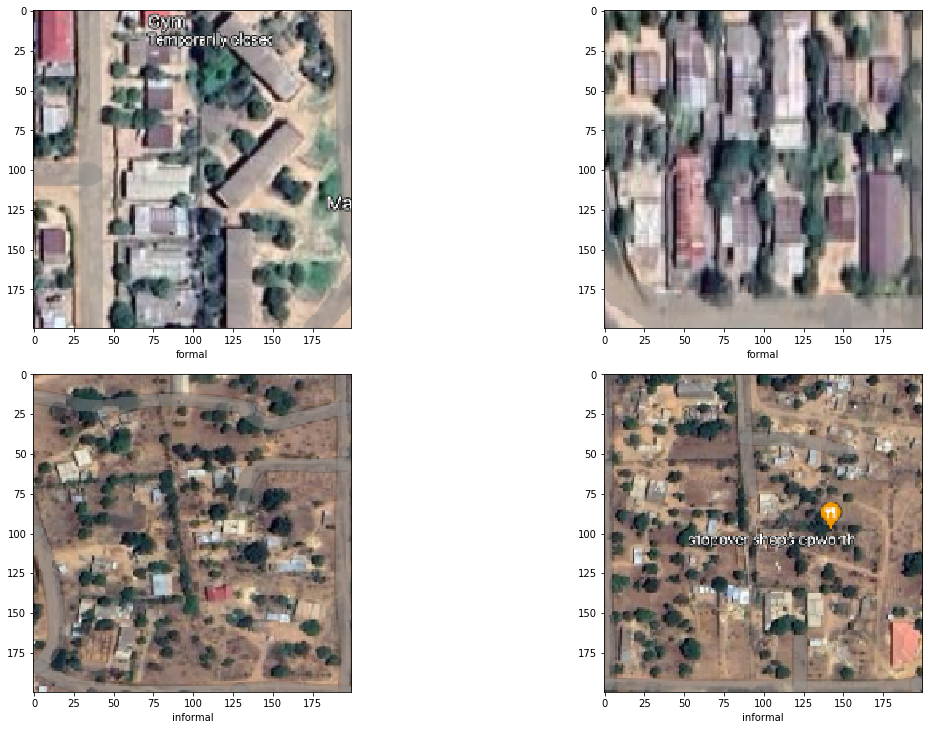

In [83]:
sample_test = test_df
sample_test.head()
plt.figure(figsize=(16, 30))
for index, row in sample_test.iterrows():
    filename = row['filename']
    category = row['category']
    img = load_img("C:/Users/Administrator/Desktop/4.2 Informatics/Geo-Info/test/"+filename, target_size=IMAGE_SIZE)
    plt.subplot(6, 2, index+1)
    if category ==1:
        plt.imshow(img)
        plt.xlabel('formal')
    else:
        plt.imshow(img)
        plt.xlabel( 'informal')
plt.tight_layout()
plt.show()